# Intrinsic subtype analysis - 6B and 4A

In [70]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sksurv
%matplotlib inline
from lifelines import KaplanMeierFitter
from sksurv.nonparametric import kaplan_meier_estimator
import plotly.express as px # import plotly express library for data visualization
import plotly.graph_objects as go # Importing plotly's graph objects module for creating visualizations.
import plotly.io as pio # import plotly io module
pio.templates.default = "plotly_dark" # Set the default template to plotly_dark for all plotly visualizations

from IPython.display import display # This line imports the display function from the IPython library, which allows us to display the output of code cells in a Jupyter Notebook.

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression



from lifelines import KaplanMeierFitter # Import the Kaplan-Meier Fitter class from the lifelines library
from lifelines.statistics import logrank_test # Import the log-rank test function from the lifelines library

In [71]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/TCGA_survival_data_intrinsic_subtypes")

In [72]:
# load the TCGA 5A/4A patients (with the Target)
tcga_5Aor4A_patients = pd.read_csv('TCGA_pts_5A.txt', sep=None, engine='python')
tcga_5Aor4A_patients

,Patient,Target
0,TCGA-AO-A0JB,0
1,TCGA-BH-A0DZ,0
2,TCGA-BH-A0BD,0
3,TCGA-E9-A22E,0
4,TCGA-E9-A22H,0
...,...,...
281,TCGA-E9-A1RE,0
282,TCGA-EW-A1PD,0
283,TCGA-GM-A2DN,0
284,TCGA-OL-A5D8,0


In [73]:
# load the TCGA 6B patients
tcga_6B_patients = pd.read_csv('TCGA_pts_6B.txt', sep=None, engine='python')
tcga_6B_patients

,Patient,Target
0,TCGA-B6-A0RO,0
1,TCGA-E2-A14Q,0
2,TCGA-C8-A12P,0
3,TCGA-C8-A1HK,0
4,TCGA-BH-A18F,0
...,...,...
131,TCGA-BH-A1FU,0
132,TCGA-D8-A1JJ,0
133,TCGA-D8-A27K,0
134,TCGA-E9-A1R0,0


In [74]:
# load the predictions of xgb from 4A
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
test_4A = pd.read_csv('Test_patients_predicted_values_xgb_4A.txt', sep=None, engine='python')
test_4A

,Patient,Target,Predicted value
0,brca_smc_2018_BB01_130,0,0
1,brca_smc_2018_BB01_110,1,1
2,brca_smc_2018_BB01_037,1,1
3,brca_smc_2018_BB01_126,1,1
4,brca_smc_2018_BR097,1,0
...,...,...,...
139,MBCProject_27uAugT4,0,1
140,MBCProject_2kS5fYc1,0,0
141,MBCProject_7oIotZSe,0,0
142,MBCProject_LVSjf8h7,0,0


In [75]:
tcga_patients_test_4A = test_4A[test_4A['Patient'].str.startswith('TCGA')]
tcga_patients_test_4A

,Patient,Target,Predicted value
16,TCGA-A2-A04P,1,1
17,TCGA-A2-A0D0,1,1
18,TCGA-A2-A0T2,1,1
19,TCGA-A2-A0YE,1,1
20,TCGA-A2-A1G1,1,1
...,...,...,...
127,TCGA-E9-A1RE,0,0
128,TCGA-EW-A1PD,0,0
129,TCGA-GM-A2DN,0,0
130,TCGA-OL-A5D8,0,0


In [76]:
tcga_patients_test_4A_list = tcga_patients_test_4A['Patient'].to_list()
tcga_patients_test_4A_list

['TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0T5',
 'TCGA-A2-A0YC',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A7-A6VX',
 'TCGA-A8-A08P',
 'TCGA-A8-A093',
 'TCGA-A8-A09M',
 'TCGA-AC-A23E',
 'TCGA-AN-A0XS',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A0TT',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO

In [77]:
# discard the test tcga patients from the total tcga patients of 5A model
tcga_patients_training_4A = tcga_5Aor4A_patients[~tcga_5Aor4A_patients['Patient'].isin(tcga_patients_test_4A_list)]
tcga_patients_training_4A

,Patient,Target
0,TCGA-AO-A0JB,0
1,TCGA-BH-A0DZ,0
2,TCGA-BH-A0BD,0
3,TCGA-E9-A22E,0
4,TCGA-E9-A22H,0
...,...,...
202,TCGA-PL-A8LV,1
203,TCGA-PL-A8LZ,1
204,TCGA-S3-AA0Z,1
205,TCGA-S3-AA10,1


In [78]:
tcga_patients_training_4A_BINARYvalue = tcga_patients_training_4A.rename(columns={'Target': 'Binary_value'}, inplace=False)
tcga_patients_training_4A_BINARYvalue

,Patient,Binary_value
0,TCGA-AO-A0JB,0
1,TCGA-BH-A0DZ,0
2,TCGA-BH-A0BD,0
3,TCGA-E9-A22E,0
4,TCGA-E9-A22H,0
...,...,...
202,TCGA-PL-A8LV,1
203,TCGA-PL-A8LZ,1
204,TCGA-S3-AA0Z,1
205,TCGA-S3-AA10,1


In [79]:
tcga_patients_test_4A_pred_value = tcga_patients_test_4A[['Patient', 'Predicted value']]
tcga_patients_test_4A_pred_value

,Patient,Predicted value
16,TCGA-A2-A04P,1
17,TCGA-A2-A0D0,1
18,TCGA-A2-A0T2,1
19,TCGA-A2-A0YE,1
20,TCGA-A2-A1G1,1
...,...,...
127,TCGA-E9-A1RE,0
128,TCGA-EW-A1PD,0
129,TCGA-GM-A2DN,0
130,TCGA-OL-A5D8,0


In [80]:
tcga_patients_test_4A_pred_value_BINARYvalue = tcga_patients_test_4A_pred_value.rename(columns={'Predicted value': 'Binary_value'}, inplace=False)
tcga_patients_test_4A_pred_value_BINARYvalue

,Patient,Binary_value
16,TCGA-A2-A04P,1
17,TCGA-A2-A0D0,1
18,TCGA-A2-A0T2,1
19,TCGA-A2-A0YE,1
20,TCGA-A2-A1G1,1
...,...,...
127,TCGA-E9-A1RE,0
128,TCGA-EW-A1PD,0
129,TCGA-GM-A2DN,0
130,TCGA-OL-A5D8,0


In [81]:
# load the predictions of polynomial SVM from 6B
test_6B = pd.read_csv('Test_patients_predicted_values_svm_poly.txt', sep=None, engine='python')
test_6B

,Patient,Target,Predicted value
0,brca_smc_2018_BB01_037,1,1
1,brca_smc_2018_BB01_110,1,1
2,brca_smc_2018_BB01_126,1,1
3,BR-M-045,1,1
4,PD4133a,1,1
...,...,...,...
68,MBCProject_pktAIxFb,0,0
69,brca_smc_2018_BR331,0,0
70,X01BR015,0,1
71,TCGA-AN-A0XS,0,0


In [82]:
tcga_patients_test_6B = test_6B[test_6B['Patient'].str.startswith('TCGA')]
tcga_patients_test_6B

,Patient,Target,Predicted value
7,TCGA-A2-A0D0,1,1
8,TCGA-AC-A6IW,1,1
9,TCGA-AN-A0AL,1,1
10,TCGA-AO-A129,1,1
11,TCGA-AR-A0TP,1,1
12,TCGA-AR-A1AJ,1,1
13,TCGA-B6-A0I1,1,1
14,TCGA-B6-A409,1,1
15,TCGA-BH-A0E0,1,1
16,TCGA-C8-A131,1,0


In [83]:
tcga_patients_test_6B_list = tcga_patients_test_6B['Patient'].to_list()
tcga_patients_test_6B_list

['TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0H3',
 'TCGA-BH-A1FU',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E9-A1R0',
 'TCGA-AN-A0XS']

In [84]:
tcga_patients_test_ONLY4A_pred_value_BINARYvalue = tcga_patients_test_4A_pred_value_BINARYvalue[~tcga_patients_test_4A_pred_value_BINARYvalue['Patient'].isin(tcga_patients_test_6B_list)]
tcga_patients_test_ONLY4A_pred_value_BINARYvalue

,Patient,Binary_value
16,TCGA-A2-A04P,1
18,TCGA-A2-A0T2,1
19,TCGA-A2-A0YE,1
20,TCGA-A2-A1G1,1
21,TCGA-A2-A3Y0,0
22,TCGA-A7-A0CE,1
23,TCGA-A7-A0DA,1
24,TCGA-A8-A07O,1
29,TCGA-AR-A0U0,1
32,TCGA-B6-A0I2,1


In [85]:
tcga_patients_test_ONLY4A_pred_value_BINARYvalue.shape

(37, 2)

In [86]:
tcga_patients_test_6B_pred_value = tcga_patients_test_6B[['Patient', 'Predicted value']]
tcga_patients_test_6B_pred_value

,Patient,Predicted value
7,TCGA-A2-A0D0,1
8,TCGA-AC-A6IW,1
9,TCGA-AN-A0AL,1
10,TCGA-AO-A129,1
11,TCGA-AR-A0TP,1
12,TCGA-AR-A1AJ,1
13,TCGA-B6-A0I1,1
14,TCGA-B6-A409,1
15,TCGA-BH-A0E0,1
16,TCGA-C8-A131,0


In [87]:
tcga_patients_test_6B_pred_value_BINARYvalue = tcga_patients_test_6B_pred_value.rename(columns={'Predicted value': 'Binary_value'}, inplace=False)
tcga_patients_test_6B_pred_value_BINARYvalue

,Patient,Binary_value
7,TCGA-A2-A0D0,1
8,TCGA-AC-A6IW,1
9,TCGA-AN-A0AL,1
10,TCGA-AO-A129,1
11,TCGA-AR-A0TP,1
12,TCGA-AR-A1AJ,1
13,TCGA-B6-A0I1,1
14,TCGA-B6-A409,1
15,TCGA-BH-A0E0,1
16,TCGA-C8-A131,0


In [88]:
tcga_6B_4A = pd.concat([tcga_patients_test_6B_pred_value_BINARYvalue, tcga_patients_test_ONLY4A_pred_value_BINARYvalue, tcga_patients_training_4A_BINARYvalue], axis=0)
tcga_6B_4A

,Patient,Binary_value
7,TCGA-A2-A0D0,1
8,TCGA-AC-A6IW,1
9,TCGA-AN-A0AL,1
10,TCGA-AO-A129,1
11,TCGA-AR-A0TP,1
...,...,...
202,TCGA-PL-A8LV,1
203,TCGA-PL-A8LZ,1
204,TCGA-S3-AA0Z,1
205,TCGA-S3-AA10,1


In [89]:
tcga_6B_4A_patients_list = tcga_6B_4A['Patient'].to_list()
tcga_6B_4A_patients_list

['TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0H3',
 'TCGA-BH-A1FU',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E9-A1R0',
 'TCGA-AN-A0XS',
 'TCGA-A2-A04P',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AR-A0U0',
 'TCGA-B6-A0I2',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-E2-A14N',
 'TCGA-E2-A573',
 'TCGA-E9-A243',
 'TCGA-OL-A66I',
 'TCGA-A2-A0T5

In [90]:
tcga_6B_4A['Patient'].duplicated().sum()

0

In [91]:
# load the intrinsic subtypes from PAM50
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/TCGA_survival_data_intrinsic_subtypes")
tcga_intrinsic_subtypes = pd.read_csv('tcga_intrinsic_subtypes.txt', sep=None, engine='python')
tcga_intrinsic_subtypes

,Patient,Intrinsic Subtype
0,TCGA-3C-AAAU,LumA
1,TCGA-3C-AALI,Her2
2,TCGA-3C-AALJ,LumB
3,TCGA-3C-AALK,LumA
4,TCGA-4H-AAAK,LumA
...,...,...
1048,TCGA-BH-A42U,Normal
1049,TCGA-E2-A108,Normal
1050,TCGA-EW-A1P7,Normal
1051,TCGA-EW-A1PG,Normal


In [92]:
# select the patients of my model
tcga_intrinsic_subtypes_6B4A = tcga_intrinsic_subtypes[tcga_intrinsic_subtypes['Patient'].isin(tcga_6B_4A_patients_list)]
tcga_intrinsic_subtypes_6B4A

,Patient,Intrinsic Subtype
1,TCGA-3C-AALI,Her2
8,TCGA-A1-A0SO,Basal
11,TCGA-A2-A0YE,Basal
12,TCGA-A2-A0YJ,Basal
14,TCGA-A7-A56D,LumA
...,...,...
1027,TCGA-E2-A1L7,LumB
1034,TCGA-A2-A0CL,Normal
1046,TCGA-BH-A1FU,Normal
1049,TCGA-E2-A108,Normal


In [93]:
# add the 6B_4A_binary_value to the intrinsic subtype dataframe
tcga_intrinsic_subtypes_binary_val = pd.merge(tcga_intrinsic_subtypes_6B4A, tcga_6B_4A, how='inner', on=['Patient'])
tcga_intrinsic_subtypes_binary_val

,Patient,Intrinsic Subtype,Binary_value
0,TCGA-3C-AALI,Her2,0
1,TCGA-A1-A0SO,Basal,1
2,TCGA-A2-A0YE,Basal,1
3,TCGA-A2-A0YJ,Basal,1
4,TCGA-A7-A56D,LumA,0
...,...,...,...
276,TCGA-E2-A1L7,LumB,0
277,TCGA-A2-A0CL,Normal,1
278,TCGA-BH-A1FU,Normal,1
279,TCGA-E2-A108,Normal,0


In [94]:
tcga_intrinsic_subtypes_binary_val['Intrinsic Subtype'].value_counts()

Intrinsic Subtype
Basal     147
LumA       73
LumB       34
Her2       14
Normal     13
Name: count, dtype: int64

In [95]:
tcga_intrinsic_subtypes_binary_val['Binary_value'].value_counts()

Binary_value
1    144
0    137
Name: count, dtype: int64

In [96]:
tcga_intrinsic_subtypes_binary_val_predictedTN = tcga_intrinsic_subtypes_binary_val.loc[tcga_intrinsic_subtypes_binary_val['Binary_value']==1]
tcga_intrinsic_subtypes_binary_val_predictedTN

,Patient,Intrinsic Subtype,Binary_value
1,TCGA-A1-A0SO,Basal,1
2,TCGA-A2-A0YE,Basal,1
3,TCGA-A2-A0YJ,Basal,1
5,TCGA-A7-A6VV,Basal,1
6,TCGA-A7-A6VW,Basal,1
...,...,...,...
247,TCGA-E2-A574,Basal,1
248,TCGA-E9-A1N8,Basal,1
249,TCGA-E9-A1ND,Basal,1
277,TCGA-A2-A0CL,Normal,1


In [97]:
tcga_intrinsic_subtypes_binary_val_predictedTN['Intrinsic Subtype'].value_counts()

Intrinsic Subtype
Basal     140
Normal      2
LumB        1
Her2        1
Name: count, dtype: int64

## Disease-free survival analysis - 6B and 4A

In [98]:
# load the disease free data 
tcga_disease_free_data = pd.read_csv('TCGA_pts_KM_Plot__Disease_Free_(months).txt', sep=None, engine='python')
tcga_disease_free_data

,Study ID,Patient ID,DFS_STATUS,DFS_MONTHS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,1:Recurred/Progressed,59.440444
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,0:DiseaseFree,48.459743
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,NaN,NaN
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,0:DiseaseFree,11.440971
...,...,...,...,...
1079,brca_tcga_pan_can_atlas_2018,TCGA-WT-AB44,0:DiseaseFree,29.029819
1080,brca_tcga_pan_can_atlas_2018,TCGA-XX-A899,0:DiseaseFree,15.353256
1081,brca_tcga_pan_can_atlas_2018,TCGA-XX-A89A,0:DiseaseFree,16.043660
1082,brca_tcga_pan_can_atlas_2018,TCGA-Z7-A8R5,NaN,NaN


In [99]:
# select the patients of my model
tcga_disease_free_data_6B4A = tcga_disease_free_data[tcga_disease_free_data['Patient ID'].isin(tcga_6B_4A_patients_list)].copy()
tcga_disease_free_data_6B4A

,Study ID,Patient ID,DFS_STATUS,DFS_MONTHS
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790
13,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SI,0:DiseaseFree,20.876484
14,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SJ,0:DiseaseFree,13.676562
16,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SM,0:DiseaseFree,7.956077
18,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SO,0:DiseaseFree,28.010652
...,...,...,...,...
1063,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LZ,NaN,NaN
1067,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA0Z,0:DiseaseFree,20.679225
1068,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA10,0:DiseaseFree,19.265542
1072,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA15,0:DiseaseFree,17.260085


In [100]:
tcga_disease_free_data_6B4A.rename(columns={'Patient ID': 'Patient'}, inplace=True)

In [101]:
tcga_6B_4A

,Patient,Binary_value
7,TCGA-A2-A0D0,1
8,TCGA-AC-A6IW,1
9,TCGA-AN-A0AL,1
10,TCGA-AO-A129,1
11,TCGA-AR-A0TP,1
...,...,...
202,TCGA-PL-A8LV,1
203,TCGA-PL-A8LZ,1
204,TCGA-S3-AA0Z,1
205,TCGA-S3-AA10,1


In [102]:
tcga_disease_free_data_6B4A

,Study ID,Patient,DFS_STATUS,DFS_MONTHS
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790
13,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SI,0:DiseaseFree,20.876484
14,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SJ,0:DiseaseFree,13.676562
16,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SM,0:DiseaseFree,7.956077
18,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SO,0:DiseaseFree,28.010652
...,...,...,...,...
1063,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LZ,NaN,NaN
1067,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA0Z,0:DiseaseFree,20.679225
1068,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA10,0:DiseaseFree,19.265542
1072,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA15,0:DiseaseFree,17.260085


In [103]:
# add the target to the disease free dataframe
tcga_disease_free_data_6B4A_binaryval = pd.merge(tcga_disease_free_data_6B4A, tcga_6B_4A, how='inner', on=['Patient'])
tcga_disease_free_data_6B4A_binaryval

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790,0
1,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SI,0:DiseaseFree,20.876484,0
2,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SJ,0:DiseaseFree,13.676562,0
3,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SM,0:DiseaseFree,7.956077,0
4,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SO,0:DiseaseFree,28.010652,1
...,...,...,...,...,...
281,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LZ,NaN,NaN,1
282,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA0Z,0:DiseaseFree,20.679225,1
283,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA10,0:DiseaseFree,19.265542,1
284,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA15,0:DiseaseFree,17.260085,1


In [104]:
tcga_disease_free_data_6B4A_binaryval_TN = tcga_disease_free_data_6B4A_binaryval.loc[tcga_disease_free_data_6B4A_binaryval['Binary_value'] == 1]
tcga_disease_free_data_6B4A_binaryval_TN

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value
4,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SO,0:DiseaseFree,28.010652,1
5,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SP,0:DiseaseFree,19.199790,1
6,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04P,NaN,NaN,1
7,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04Q,0:DiseaseFree,78.410100,1
8,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04T,0:DiseaseFree,73.840287,1
...,...,...,...,...,...
280,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LV,NaN,NaN,1
281,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LZ,NaN,NaN,1
282,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA0Z,0:DiseaseFree,20.679225,1
283,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA10,0:DiseaseFree,19.265542,1


In [105]:
tcga_disease_free_data_6B4A_binaryval_nonTN = tcga_disease_free_data_6B4A_binaryval.loc[tcga_disease_free_data_6B4A_binaryval['Binary_value'] == 0]
tcga_disease_free_data_6B4A_binaryval_nonTN

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790,0
1,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SI,0:DiseaseFree,20.876484,0
2,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SJ,0:DiseaseFree,13.676562,0
3,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SM,0:DiseaseFree,7.956077,0
10,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04V,1:Recurred/Progressed,48.328238,0
...,...,...,...,...,...
273,brca_tcga_pan_can_atlas_2018,TCGA-OL-A5D8,NaN,NaN,0
274,brca_tcga_pan_can_atlas_2018,TCGA-OL-A5RU,0:DiseaseFree,40.076273,0
276,brca_tcga_pan_can_atlas_2018,TCGA-OL-A5S0,0:DiseaseFree,20.383338,0
279,brca_tcga_pan_can_atlas_2018,TCGA-OL-A6VR,0:DiseaseFree,40.109149,0


In [106]:
# add the recurred before 5 years column
tcga_disease_free_data_6B4A_binaryval.loc[:, 'Recurred before 5 years'] = np.where(
    (tcga_disease_free_data_6B4A_binaryval['DFS_STATUS'] == '1:Recurred/Progressed') & (tcga_disease_free_data_6B4A_binaryval['DFS_MONTHS'] < 60),
    1, 0
)
tcga_disease_free_data_6B4A_binaryval

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value,Recurred before 5 years
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790,0,0
1,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SI,0:DiseaseFree,20.876484,0,0
2,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SJ,0:DiseaseFree,13.676562,0,0
3,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SM,0:DiseaseFree,7.956077,0,0
4,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SO,0:DiseaseFree,28.010652,1,0
...,...,...,...,...,...,...
281,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LZ,NaN,NaN,1,0
282,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA0Z,0:DiseaseFree,20.679225,1,0
283,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA10,0:DiseaseFree,19.265542,1,0
284,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA15,0:DiseaseFree,17.260085,1,0


In [107]:
tcga_disease_free_data_6B4A_binaryval.loc[tcga_disease_free_data_6B4A_binaryval['Recurred before 5 years']==1]

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value,Recurred before 5 years
10,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04V,1:Recurred/Progressed,48.328238,0,1
12,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0CM,1:Recurred/Progressed,12.558766,1,1
20,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0SX,1:Recurred/Progressed,40.733800,1,1
28,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0YJ,1:Recurred/Progressed,18.377881,1,1
41,brca_tcga_pan_can_atlas_2018,TCGA-A7-A13E,1:Recurred/Progressed,18.279252,1,1
107,brca_tcga_pan_can_atlas_2018,TCGA-AR-A1AI,1:Recurred/Progressed,19.331295,1,1
110,brca_tcga_pan_can_atlas_2018,TCGA-AR-A1AR,1:Recurred/Progressed,8.810862,1,1
117,brca_tcga_pan_can_atlas_2018,TCGA-AR-A256,1:Recurred/Progressed,53.917217,1,1
118,brca_tcga_pan_can_atlas_2018,TCGA-B6-A0I1,1:Recurred/Progressed,36.821514,1,1
123,brca_tcga_pan_can_atlas_2018,TCGA-B6-A0IK,1:Recurred/Progressed,16.076536,0,1


In [108]:
(tcga_disease_free_data_6B4A_binaryval.loc[tcga_disease_free_data_6B4A_binaryval['Recurred before 5 years']==1])['Binary_value'].value_counts()

Binary_value
1    14
0     4
Name: count, dtype: int64

In [109]:
# Check for NaN values in 'DFS_MONTHS' and 'DFS_STATUS' and replace 0 with NaN
mask = (pd.isnull(tcga_disease_free_data_6B4A_binaryval['DFS_MONTHS'])) | (pd.isnull(tcga_disease_free_data_6B4A_binaryval['DFS_STATUS']))

if mask.any():
    tcga_disease_free_data_6B4A_binaryval.loc[:, 'Recurred before 5 years'] = np.where(mask, np.nan, tcga_disease_free_data_6B4A_binaryval['Recurred before 5 years'])

In [110]:
tcga_disease_free_data_6B4A_binaryval

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value,Recurred before 5 years
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790,0,0.0
1,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SI,0:DiseaseFree,20.876484,0,0.0
2,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SJ,0:DiseaseFree,13.676562,0,0.0
3,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SM,0:DiseaseFree,7.956077,0,0.0
4,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SO,0:DiseaseFree,28.010652,1,0.0
...,...,...,...,...,...,...
281,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LZ,NaN,NaN,1,NaN
282,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA0Z,0:DiseaseFree,20.679225,1,0.0
283,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA10,0:DiseaseFree,19.265542,1,0.0
284,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA15,0:DiseaseFree,17.260085,1,0.0


In [111]:
tcga_disease_free_data_6B4A_binaryval['Recurred before 5 years'].isna().sum()

34

## Build the Kaplan-Meier curves

### Consider the variable 'Recurred before 5 years' for the construction of the KM curves

In [112]:
tcga_disease_free_data_6B4A_binaryval

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value,Recurred before 5 years
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790,0,0.0
1,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SI,0:DiseaseFree,20.876484,0,0.0
2,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SJ,0:DiseaseFree,13.676562,0,0.0
3,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SM,0:DiseaseFree,7.956077,0,0.0
4,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SO,0:DiseaseFree,28.010652,1,0.0
...,...,...,...,...,...,...
281,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LZ,NaN,NaN,1,NaN
282,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA0Z,0:DiseaseFree,20.679225,1,0.0
283,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA10,0:DiseaseFree,19.265542,1,0.0
284,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA15,0:DiseaseFree,17.260085,1,0.0


In [113]:
# delete the patients disease free with DFS_MONTHS <= 60 (5 years) 
mask1 = (tcga_disease_free_data_6B4A_binaryval['DFS_STATUS'] == '0:DiseaseFree') & (tcga_disease_free_data_6B4A_binaryval['DFS_MONTHS'] <= 60)
final_survival_table_noDiseaseFreeWithin5y = tcga_disease_free_data_6B4A_binaryval[~mask1]
final_survival_table_noDiseaseFreeWithin5y

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value,Recurred before 5 years
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790,0,0.0
6,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04P,NaN,NaN,1,NaN
7,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04Q,0:DiseaseFree,78.410100,1,0.0
8,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04T,0:DiseaseFree,73.840287,1,0.0
9,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04U,0:DiseaseFree,87.253838,1,0.0
...,...,...,...,...,...,...
265,brca_tcga_pan_can_atlas_2018,TCGA-GM-A3XL,0:DiseaseFree,69.303350,1,0.0
273,brca_tcga_pan_can_atlas_2018,TCGA-OL-A5D8,NaN,NaN,0,NaN
280,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LV,NaN,NaN,1,NaN
281,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LZ,NaN,NaN,1,NaN


In [114]:
# delete the patients recurred with DFS_MONTHS > 60
mask2 = (final_survival_table_noDiseaseFreeWithin5y['DFS_STATUS'] == '1:Recurred/Progressed') & (final_survival_table_noDiseaseFreeWithin5y['DFS_MONTHS'] > 60)
final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y = final_survival_table_noDiseaseFreeWithin5y[~mask2]
final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value,Recurred before 5 years
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790,0,0.0
6,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04P,NaN,NaN,1,NaN
7,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04Q,0:DiseaseFree,78.410100,1,0.0
8,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04T,0:DiseaseFree,73.840287,1,0.0
9,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04U,0:DiseaseFree,87.253838,1,0.0
...,...,...,...,...,...,...
265,brca_tcga_pan_can_atlas_2018,TCGA-GM-A3XL,0:DiseaseFree,69.303350,1,0.0
273,brca_tcga_pan_can_atlas_2018,TCGA-OL-A5D8,NaN,NaN,0,NaN
280,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LV,NaN,NaN,1,NaN
281,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LZ,NaN,NaN,1,NaN


In [115]:
final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y['Binary_value'].value_counts()

Binary_value
1    61
0    50
Name: count, dtype: int64

In [116]:
final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y_TN = final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y.loc[final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y['Binary_value']==1]
final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y_TN

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value,Recurred before 5 years
6,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04P,NaN,NaN,1,NaN
7,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04Q,0:DiseaseFree,78.410100,1,0.0
8,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04T,0:DiseaseFree,73.840287,1,0.0
9,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04U,0:DiseaseFree,87.253838,1,0.0
11,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0CL,NaN,NaN,1,NaN
...,...,...,...,...,...,...
253,brca_tcga_pan_can_atlas_2018,TCGA-EW-A1P8,1:Recurred/Progressed,6.805405,1,1.0
261,brca_tcga_pan_can_atlas_2018,TCGA-GM-A2DF,0:DiseaseFree,70.848539,1,0.0
265,brca_tcga_pan_can_atlas_2018,TCGA-GM-A3XL,0:DiseaseFree,69.303350,1,0.0
280,brca_tcga_pan_can_atlas_2018,TCGA-PL-A8LV,NaN,NaN,1,NaN


In [117]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM = final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y_TN[['Recurred before 5 years', 'DFS_MONTHS']].copy()
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM

,Recurred before 5 years,DFS_MONTHS
6,NaN,NaN
7,0.0,78.410100
8,0.0,73.840287
9,0.0,87.253838
11,NaN,NaN
...,...,...
253,1.0,6.805405
261,0.0,70.848539
265,0.0,69.303350
280,NaN,NaN


In [118]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM.isna().sum()

Recurred before 5 years    16
DFS_MONTHS                 16
dtype: int64

In [119]:
# delete the rows for which the Disease Free survival data are missing
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM = noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM.dropna(subset=["DFS_MONTHS"]).copy()
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM

,Recurred before 5 years,DFS_MONTHS
7,0.0,78.410100
8,0.0,73.840287
9,0.0,87.253838
12,1.0,12.558766
15,0.0,67.330769
19,0.0,99.187954
20,1.0,40.733800
28,1.0,18.377881
32,0.0,91.067495
41,1.0,18.279252


In [120]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM.shape

(45, 2)

In [121]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM['Recurred before 5 years'].value_counts()

Recurred before 5 years
0.0    31
1.0    14
Name: count, dtype: int64

In [122]:
final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y_nonTN = final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y.loc[final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y['Binary_value']==0]
final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y_nonTN

,Study ID,Patient,DFS_STATUS,DFS_MONTHS,Binary_value,Recurred before 5 years
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:DiseaseFree,131.669790,0,0.0
10,brca_tcga_pan_can_atlas_2018,TCGA-A2-A04V,1:Recurred/Progressed,48.328238,0,1.0
13,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0CS,NaN,NaN,0,NaN
14,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0CU,NaN,NaN,0,NaN
17,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0EQ,0:DiseaseFree,79.758030,0,0.0
18,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0ER,0:DiseaseFree,74.399185,0,0.0
24,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0YC,NaN,NaN,0,NaN
34,brca_tcga_pan_can_atlas_2018,TCGA-A2-A3Y0,NaN,NaN,0,NaN
36,brca_tcga_pan_can_atlas_2018,TCGA-A7-A0CJ,NaN,NaN,0,NaN
39,brca_tcga_pan_can_atlas_2018,TCGA-A7-A0DB,NaN,NaN,0,NaN


In [123]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM = final_survival_table_noDiseaseFreeWithin5y_noRecurredafter5y_nonTN[['Recurred before 5 years', 'DFS_MONTHS']].copy()
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM

,Recurred before 5 years,DFS_MONTHS
0,0.0,131.669790
10,1.0,48.328238
13,NaN,NaN
14,NaN,NaN
17,0.0,79.758030
18,0.0,74.399185
24,NaN,NaN
34,NaN,NaN
36,NaN,NaN
39,NaN,NaN


In [124]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM.isna().sum()

Recurred before 5 years    18
DFS_MONTHS                 18
dtype: int64

In [125]:
# delete the rows for which the Disease Free survival data are missing
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM = noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM.dropna(subset=["DFS_MONTHS"]).copy()
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM

,Recurred before 5 years,DFS_MONTHS
0,0.0,131.669790
10,1.0,48.328238
17,0.0,79.758030
18,0.0,74.399185
84,0.0,80.284052
85,0.0,61.347273
92,0.0,65.095177
94,0.0,82.684025
102,0.0,109.017983
104,0.0,134.135516


In [126]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM.shape

(32, 2)

In [127]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM['Recurred before 5 years'].value_counts()

Recurred before 5 years
0.0    28
1.0     4
Name: count, dtype: int64

In [128]:
def plot_survival_probability(plot_title: str, legend_title: str, names: list, survival_functions: list, confidence_intervals: list):
   
    """
    Plots the survival probability for two groups over time.
    
    Parameters:
        plot_title (str): Title for the plot.
        legend_title (str): Title for the legend.
        names (list): List of strings containing the names of the groups.
        survival_functions (list): List of DataFrames containing the survival functions for the groups.
        confidence_intervals (list): List of DataFrames containing the confidence intervals for the survival functions.
        
    Returns:
        None
    """
    
    fig = go.Figure() # Create a new figure object for creating a plot with the plotly library.
    
    # Add survival curve and confidence interval traces to the figure for the first group.
    fig.add_traces([

        go.Scatter(
            x=survival_functions[0].index,
            y=survival_functions[0]["KM_estimate"],
            line=dict(color='rgb(3, 196, 161)', width = 2),
            mode='lines',
            name = names[0]
        ),

        go.Scatter(
            name = "Upper Bound",
            x=survival_functions[0].index,
            y=confidence_intervals[0]["KM_estimate_upper_0.95"],
            fill='tonextx',
            fillcolor='rgba(3, 196, 161,0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo="skip",
            showlegend=False
        ),

        go.Scatter(
            name = "Lower Bound",
            x=survival_functions[0].index,
            y=confidence_intervals[0]["KM_estimate_lower_0.95"],
            fill='tonextx',
            fillcolor='rgba(3, 196, 161,0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo="skip",
            showlegend=False
        )

    ])
    
    # Add survival curve and confidence interval traces to the figure for the second group.
    fig.add_traces([

        go.Scatter(
            x=survival_functions[1].index,
            y=survival_functions[1]["KM_estimate"],
            line=dict(color='rgb(251, 37, 118)', width = 2),
            mode='lines',
            name = names[1]
        ),

        go.Scatter(
            name = "Upper Bound",
            x=survival_functions[1].index,
            y=confidence_intervals[1]["KM_estimate_upper_0.95"],
            fill='tonextx',
            fillcolor='rgba(251, 37, 118,0.2)',
            line=dict(color='rgba(251, 37, 118,0)'),
            showlegend=False
        ),

        go.Scatter(
            name = "Lower Bound",
            x=survival_functions[0].index,
            y=confidence_intervals[0]["KM_estimate_lower_0.95"],
            fill='tonextx',
            fillcolor='rgba(251, 37, 118,0.2)',
            line=dict(color='rgba(251, 37, 118,0)'),
            showlegend=False
        )

    ])
    
    # Update the layout of the figure, including the y-axis title, x-axis title, plot title, hover mode, and legend title.
    fig.update_layout(
        yaxis_title='Survival Probability',
        xaxis_title = "Time (months)",
        title= plot_title,
        hovermode="x",
        legend_title = legend_title
    )
    
    # Set the y-axis range from 0 to 1
    fig.update_yaxes(range=[0, 1])
    # Set the x-axis range from 0 to 62
    fig.update_xaxes(range=[0, 62])
    
    fig.show() # Show the plot.

In [129]:
kmf_TN4A_DF = KaplanMeierFitter() # Create a Kaplan-Meier object for 5A TN patients

kmf_TN4A_DF.fit(noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM['DFS_MONTHS'], event_observed=noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM['Recurred before 5 years']) # Fit the Kaplan-Meier estimator to the time and death event data for 4A TN patients.

kmf_totalNONTN_DF = KaplanMeierFitter() # Create a Kaplan-Meier object the other TN patients 

kmf_totalNONTN_DF.fit(noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM["DFS_MONTHS"], event_observed=noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM['Recurred before 5 years']) # Fit the Kaplan-Meier estimator to the time and death event data for the other TN patients.

TN4A_survival_function_DF = kmf_TN4A_DF.survival_function_ # Create a variable to store the male survival function calculated by the Kaplan-Meier estimator.
allNONTN_survival_function_DF = kmf_totalNONTN_DF.survival_function_ # Create a variable to store the female survival function calculated by the Kaplan-Meier estimator.

In [130]:
# Plot the survival curves for TN 5A and the other TN.
plot_survival_probability('Survival Curves for 4A/6B TNBC patients and 4A/6B NON-TNBC patients (Disease free within 5 years)', "Patients' group", 
                  ["TNBC", "non-TNBC"], [TN4A_survival_function_DF, allNONTN_survival_function_DF],
                  [kmf_TN4A_DF.confidence_interval_, kmf_totalNONTN_DF.confidence_interval_])

In [131]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM

,Recurred before 5 years,DFS_MONTHS
0,0.0,131.669790
10,1.0,48.328238
17,0.0,79.758030
18,0.0,74.399185
84,0.0,80.284052
85,0.0,61.347273
92,0.0,65.095177
94,0.0,82.684025
102,0.0,109.017983
104,0.0,134.135516


In [132]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM.shape

(45, 2)

In [133]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM

,Recurred before 5 years,DFS_MONTHS
0,0.0,131.669790
10,1.0,48.328238
17,0.0,79.758030
18,0.0,74.399185
84,0.0,80.284052
85,0.0,61.347273
92,0.0,65.095177
94,0.0,82.684025
102,0.0,109.017983
104,0.0,134.135516


In [134]:
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM.shape

(32, 2)

In [135]:
# Replace values in the 'Survival_Status' column
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM['Recurred before 5 years'] = noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM['Recurred before 5 years'].replace({0: False, 1: True})
noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM

,Recurred before 5 years,DFS_MONTHS
7,False,78.410100
8,False,73.840287
9,False,87.253838
12,True,12.558766
15,False,67.330769
19,False,99.187954
20,True,40.733800
28,True,18.377881
32,False,91.067495
41,True,18.279252


In [136]:
# Replace values in the 'Survival_Status' column
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM['Recurred before 5 years'] = noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM['Recurred before 5 years'].replace({0: False, 1: True})
noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM

,Recurred before 5 years,DFS_MONTHS
0,False,131.669790
10,True,48.328238
17,False,79.758030
18,False,74.399185
84,False,80.284052
85,False,61.347273
92,False,65.095177
94,False,82.684025
102,False,109.017983
104,False,134.135516


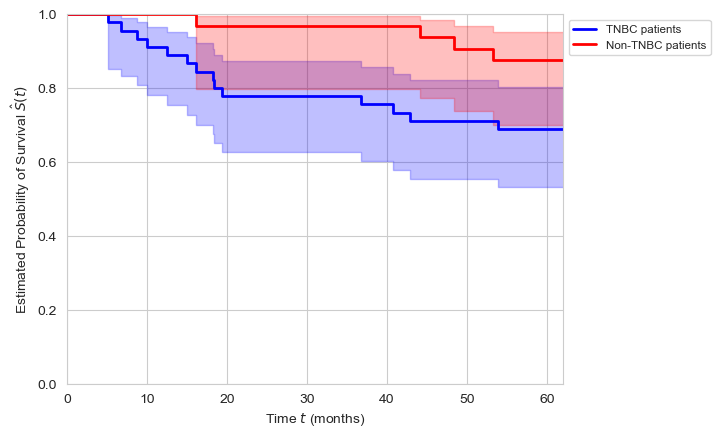

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Set the seaborn style
sns.set_style("whitegrid")

# Define the Kaplan-Meier estimator function
def plot_km_curve(data, label, color):
    kmf = KaplanMeierFitter()
    kmf.fit(data['DFS_MONTHS'], event_observed=data["Recurred before 5 years"], label=label)
    kmf.plot(ci_show=True, ci_alpha=0.25, color=color, linewidth=2)

# Plot the first curve in blue
plot_km_curve(noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM, "TNBC patients", "blue")

# Plot the second curve in red
plot_km_curve(noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM, "Non-TNBC patients", "red")

# Set plot attributes
plt.ylim(0, 1)
plt.xlim(0, 62)
plt.ylabel("Estimated Probability of Survival $\hat{S}(t)$")
plt.xlabel("Time $t$ (months)")
plt.legend(fontsize="small", bbox_to_anchor=(1, 1))  # Display legend with curve labels
#plt.title("Survival Curves for 2E2C TNBC patients vs 2E2C non-TNBC patients - Disease-free within 5 Years", 
          #fontsize=14, fontweight='bold', y=1.05) # Adjust title properties and position

# Show the plot
plt.show()

### Log-rank test

In [138]:
# Perform the log-rank test to compare the survival curves for 5A TN and other TN patients based on their time and death event data.
results_4ATN_vs_4AnonTN_DF = logrank_test(noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM['DFS_MONTHS'], noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM['DFS_MONTHS'], 
                       noDiseaseFreeWithin5y_noRecurredafter5y_4A_TN_KM['Recurred before 5 years'], noDiseaseFreeWithin5y_noRecurredafter5y_4A_nonTN_KM['Recurred before 5 years'])

display(results_4ATN_vs_4AnonTN_DF) 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.94 0.05      4.41

The p-value of 0.05 (lower than 0.05) suggests that the two survival curves are statistically different.